In [41]:
f<-read.csv("mr_data.csv")

In [177]:
tn1<-read.csv("mr_data_grouped.csv")

In [179]:
TN<-tn1 %>%
    group_by(Desert) %>%
    mutate(percent = value/sum(value)*100)

In [181]:
df_in<- TN[TN$Trophic.Niche== 'Invertivore',]

In [183]:
mean(df_in$percent)

[1] 34.82319

In [184]:
library(ggplot2)

In [185]:
library(tidyverse)

In [56]:
TN$Trophic.Niche<-factor(TN$Trophic.Niche, levels = c('Herbivore terrestrial', 'Nectarivore', 'Scavenger','Frugivore','Herbivore aquatic',
                                                      'Vertivore', 'Granivore', 'Aquatic predator', 'Omnivore', 'Invertivore'))

In [186]:
TN$Trophic.Niche<-factor(TN$Trophic.Niche, levels = c('Invertivore','Omnivore','Aquatic predator','Granivore','Vertivore','Herbivore aquatic',
                                                      'Frugivore','Scavenger','Nectarivore','Herbivore terrestrial'))

In [235]:
width_scale <- 6 * 15 / length(unique(TN$Trophic.Niche))

In [445]:
pt<- ggplot(data = TN, aes(x = fct_inorder(Desert), y = percent, group = Trophic.Niche, fill = Trophic.Niche))+ggtitle("Trophic niches")
pt <- pt + geom_bar(position="fill", stat = "identity", width = 0.7)
pt <- pt + facet_grid(Position~.,  scales = "free_y",  space = "free_y",  switch = "x") +scale_y_continuous(labels = scales::percent)
tpn<-pt+ theme_bw()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ scale_fill_manual(values = c("#8FBC8F", "#808000", "#B2B8A3", "#556B2F", "#78866B", 
                             "#F0E68C", "#6F4E37", "#D2B48C", "#CD7F32","#BDB76B"), guide = guide_legend(nrow= 4))+ labs(x = "Deserts", y= "Percentage")+
theme(legend.text=element_text(size=9.5), legend.title= element_text(size = 10), plot.title= element_text(size = 15))+ theme(text = element_text(size = 15)) +theme(legend.position="bottom")+theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.title.x = element_blank(),
    axis.ticks.y = element_blank(),
    legend.title = element_blank()
  )+ coord_flip()

In [29]:
dat<-f[,c(2:12)]

In [44]:
rownames(dat)<-f[,2]

In [30]:
dat <- dat[sapply(dat, is.numeric)]

In [47]:
dat <- na.omit(dat)  # Removes rows with any NA values
# For NaN and Inf, you might need a more tailored approach depending on your needs

In [48]:
k.max <- 10
wss <- sapply(1:k.max, function(k){kmeans(dat, k, nstart=50,iter.max = 10 )$tot.withinss})

In [13]:
dev.off()

pdf 
  3

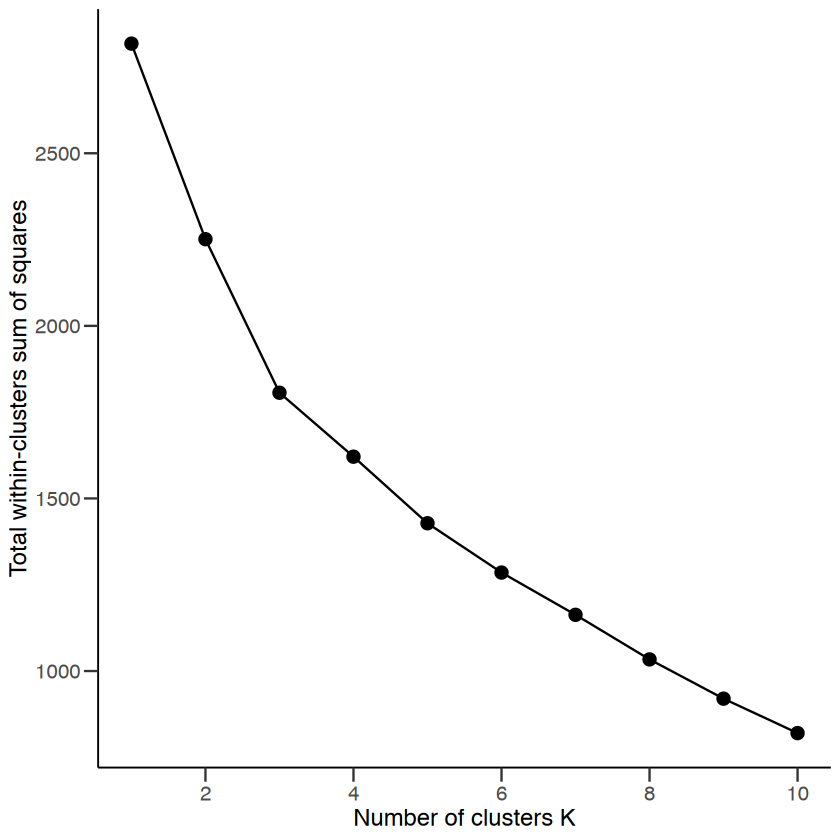

In [68]:
ggplot(wss_plot, aes(x= x, y=y))+ geom_line()+ geom_point(pch = 19, size = 3) +scale_x_continuous(breaks = integer_breaks())+theme(axis.ticks.length  = unit(0.3, "cm")) +labs(x="Number of clusters K",y="Total within-clusters sum of squares")+theme(axis.line = element_line(color = "black",
                                 linewidth = 0.4,
                                 linetype = 1))+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
panel.background = element_blank())+
 theme(axis.text = element_text(size = 12))+ theme(axis.title = element_text(size = 14))

In [51]:
library(magrittr)
library(dplyr)
library(ggpubr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2



In [63]:
dat1<-t(dat1)

In [65]:
mds <- dat1 %>%
  dist() %>%          
  cmdscale() %>%
  as_tibble()
colnames(mds) <- c("Dim.1", "Dim.2")

In [66]:
clust <- kmeans(mds, 3)$cluster %>%
  as.factor()
mds <- mds %>%
  mutate(groups = clust)

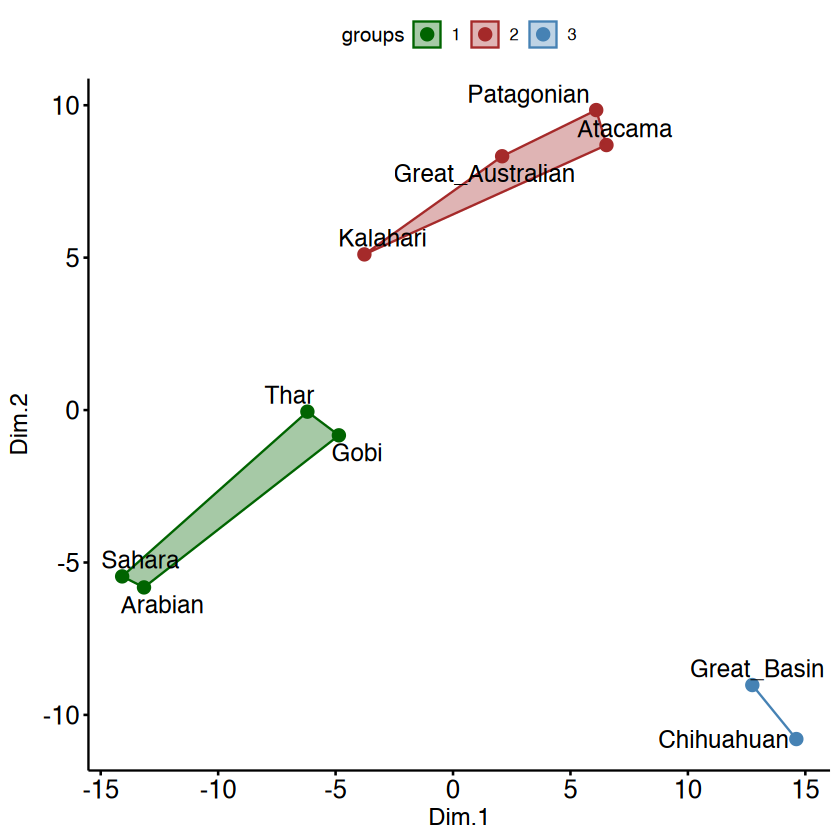

In [68]:
ggscatter(mds, x = "Dim.1", y = "Dim.2",label = rownames(dat1),color = "groups", size = 3, 
            ellipse = TRUE, ellipse.type = "convex", repel = TRUE, palette =  c("darkgreen", "brown","steelblue"),
            ellipse.alpha = 0.35,font.label = c(15, "plain", "black"), font.tickslab = c(15,"bold"),font.x = c(14, "bold"),
   font.y = c(14, "bold"))

In [70]:
summary(mds)

     Dim.1              Dim.2          groups
 Min.   :-14.0871   Min.   :-10.7926   1:4   
 1st Qu.: -5.8653   1st Qu.: -5.7273   2:4   
 Median : -0.8415   Median : -0.4406   3:2   
 Mean   :  0.0000   Mean   :  0.0000         
 3rd Qu.:  6.4237   3rd Qu.:  7.5215         
 Max.   : 14.6166   Max.   :  9.8415         

In [56]:
dat1<-read.csv("diversity.csv", header= T)

In [57]:
rownames(dat1)<-dat1[,1]

In [58]:
dat1<-dat1[,-1]

In [76]:
dat2<-t(dat1)

In [221]:
write.csv(dat_1, "diversity.csv")

In [70]:
frq<-read.csv("frq.csv")

In [71]:
head(frq)

,Position,Desert,Migration,Frequency
,<chr>,<chr>,<chr>,<dbl>
1,Tropic of capricorn,Great_Australian,S,0.6077170
2,Tropic of capricorn,Great_Australian,PM,0.2315113
3,Tropic of capricorn,Great_Australian,M,0.1607717
4,Tropic of capricorn,Kalahari,S,0.6443850
5,Tropic of capricorn,Kalahari,PM,0.1657754
6,Tropic of capricorn,Kalahari,M,0.1898396


In [640]:
library(tidyverse)

In [1566]:
p<- ggplot(data = frq, aes(x = fct_inorder(Desert), y = Frequency, group = Migration, fill = Migration))
p <- p + geom_bar(position="fill", stat = "identity", width = 0.7)
p <- p + facet_grid(Position~.,  scales = "free_y",  space = "free_y",  switch = "x")+scale_y_continuous(labels = scales::percent)
contri<-p + theme_bw()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ scale_fill_manual(values = c("darkblue","steelblue1","steelblue4"))+ labs(y= "Percentage")+
  theme(text = element_text(size = 20), axis.title.y= element_blank())+theme(legend.text=element_text(size=12), legend.title= element_text(size = 12), legend.position="bottom")+ coord_flip()

In [457]:
p<- ggplot(data = frq, aes(x = fct_inorder(Desert), y = Frequency, group = Migration, fill = Migration))+ggtitle("Migration")
p <- p + geom_bar(position="fill", stat = "identity", width = 0.7)
p <- p + facet_grid(Position~.,  scales = "free_y",  space = "free_y",  switch = "x")+scale_y_continuous(labels = scales::percent)
contri<-p + theme_bw()+ theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+ scale_fill_manual(values = c("darkblue","steelblue1","steelblue4"), labels=c('Migratory', 'Partial Migratory', 'Sedentary'),guide = guide_legend(nrow= 4))+ labs(x = "Deserts", y= "Percentage")+
  theme(text = element_text(size = 15))+theme(legend.text=element_text(size=10), legend.title= element_blank(), plot.title= element_text(size = 15),axis.title.x = element_blank(), axis.title.y = element_blank()) + theme(legend.position="bottom")+ theme(strip.text = element_blank()) + coord_flip()

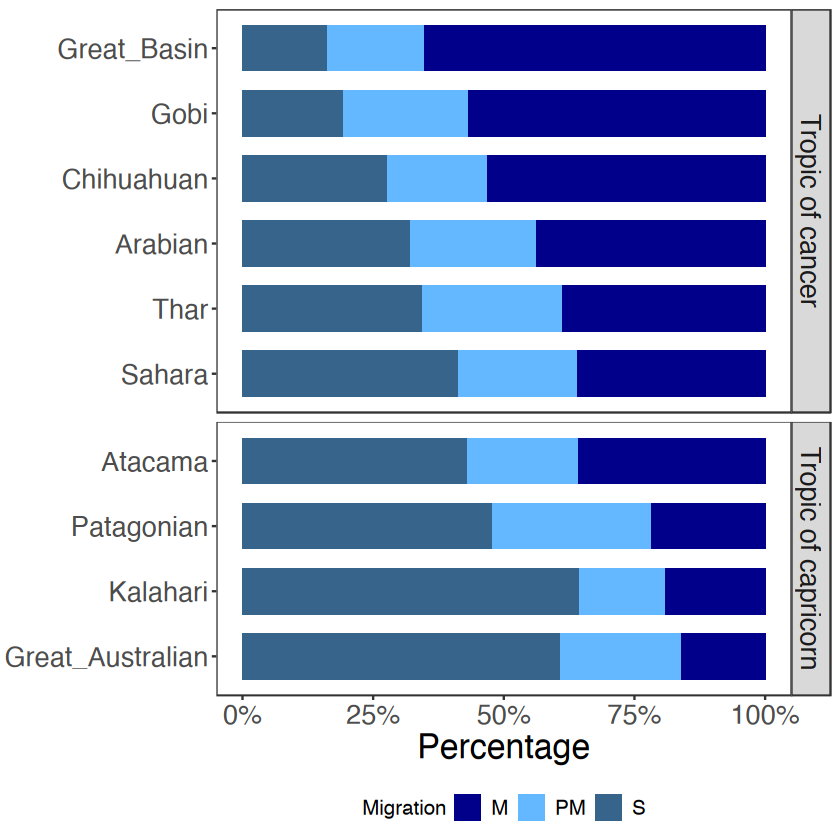

In [1567]:
contri

In [638]:
library(ggplot2)

In [760]:
library(tidyverse)

In [765]:
world_coordinates <- map_data("world")

In [1325]:
data <- data.frame(
  Tropics = c(rep("TC", 6), rep("TP", 4)),
  Deserts = c("Sahara", "Arabian", "Thar", "Gobi", "Chihuahuan", "Great_Basin",
              "Great_Australian", "Kalahari", "Atacama", "Patagonian"),
  S = c(253, 166, 110, 70, 120, 67, 172, 216, 107, 107),
  M = c(169, 214, 117, 196, 222, 214, 39, 63, 58, 54),
  PM = c(120, 121, 80, 85, 82, 66, 59, 50, 49, 67)
)
library(tidyr)
data_long <- pivot_longer(data, cols = S:PM, names_to = "Migration", values_to = "Count")


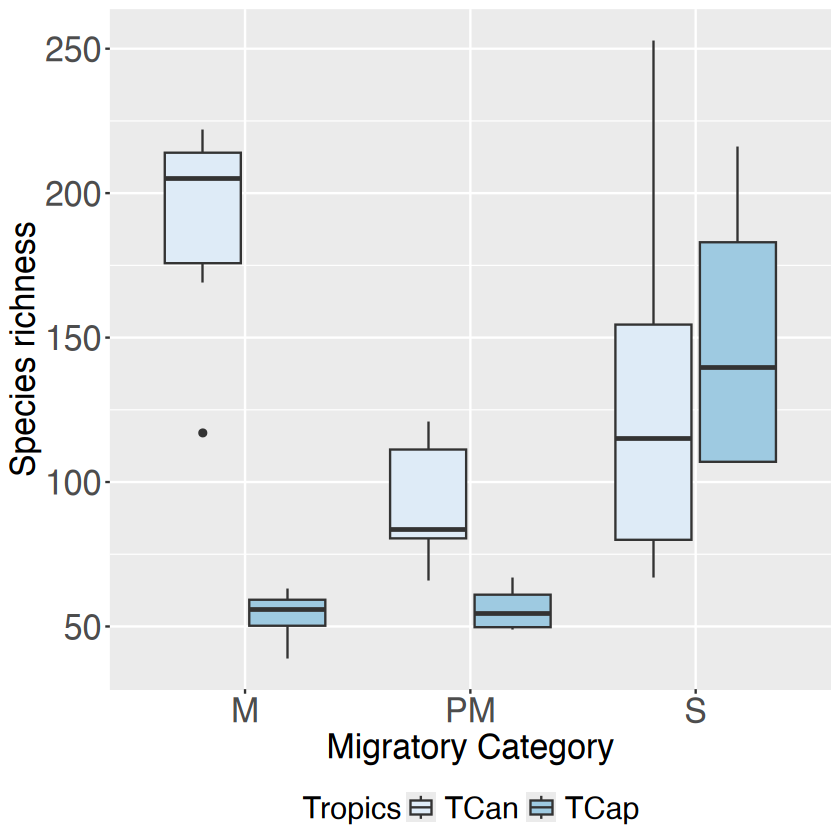

In [1557]:
library(ggplot2)

ggplot(data_long, aes(x = Migration, y = Count, fill = Tropics)) +
  geom_boxplot()+
  scale_fill_brewer()+
  labs(x = "Migratory Category", 
       y = "Species richness")+theme(legend.position= "bottom", axis.text=element_text(size=20), axis.title=element_text(size=20),
                                     legend.text= element_text(size=18), legend.title= element_text(size=18))


In [1443]:
install.packages("networkD3")
library(networkD3)
library(dplyr)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



ERROR: Error in select(., source, target, Count): unused arguments (source, target, Count)


In [1444]:
library(dplyr)

In [1645]:
tcan_s<-data[1:149,]

In [1646]:
tcap_s<-data[150:235,]

In [1647]:
nodes<- data.frame(
  name = unique(c(as.character(tcan_s$Deserts), 
                  as.character(tcan_s$Migration), 
                  as.character(tcan_s$Trophic.Niche)))
)



links_desert_migration <- tcan_s %>%
  mutate(source = match(Deserts, nodes$name) - 1,
         target = match(Migration, nodes$name) - 1) %>%
  dplyr::select(source, target, Count, Migration) %>%
  dplyr::rename(value = Count, group = Migration)


links_migration_trophic <- tcan_s %>%
  mutate(source = match(Migration, nodes$name) - 1,
         target = match(Trophic.Niche, nodes$name) - 1) %>%
  dplyr::select(source, target, Count, Migration) %>%
  dplyr::rename(value = Count, group = Migration)


links <- dplyr::bind_rows(links_desert_migration, links_migration_trophic)


my_color <- 'd3.scaleOrdinal() .domain(["Migratory", "Partial_migratory", "Sedentary", "Sahara", "Arabian", "Thar","Gobi", "Great_Basin", "Chihuahuan", "Atacama", "Patagonian", "Kalahari", "Great_Australian"]) 
.range(["#B3E2CD", "#FDCDAC", "#CBD5E8", "#A6CEE3", "#1F78B4", "#B2DF8A", "#33A02C", "#FB9A99", "#E31A1C", "#FDBF6F", "#FF7F00", "#CAB2D6", "#6A3D9A", "#FFFF99", "#B15928"])'


sankey_can <- sankeyNetwork(Links = links, Nodes = nodes, 
                        Source = "source", Target = "target", 
                        Value = "value", NodeID = "name", 
                        LinkGroup = "group", 
                        colourScale = my_color, 
                        sinksRight = FALSE, fontSize = 20, nodeWidth = 30)


sankey_can


HTML widgets cannot be represented in plain text (need html)

In [27]:
manova_model <- manova(cbind(Sedentary, Migratory, Partial_migratory) ~ Tropics, data = data)
summary(manova_model)

          Df  Pillai approx F num Df den Df   Pr(>F)   
Tropics    1 0.87711   14.275      3      6 0.003868 **
Residuals  8                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [29]:
summary(aov(Sedentary ~ Tropics, data = data))
summary(aov(Migratory ~ Tropics, data = data))
summary(aov(Partial_migratory ~ Tropics, data = data))

            Df Sum Sq Mean Sq F value Pr(>F)
Tropics      1    913     913   0.221  0.651
Residuals    8  33025    4128               

            Df Sum Sq Mean Sq F value   Pr(>F)    
Tropics      1  43848   43848    42.3 0.000187 ***
Residuals    8   8292    1037                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)  
Tropics      1   3125    3125   8.902 0.0175 *
Residuals    8   2808     351                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [121]:
library(dplyr)
library(tidyr)
library(ggplot2)

data <- data.frame(
  Position = c(rep("Tropic of cancer", 6), rep("Tropic of Capricorn", 4)),
  Deserts = c("Great_Basin", "Gobi", "Chihuahuan", "Arabian", "Thar", "Sahara", 
              "Atacama", "Patagonian", "Kalahari", "Great_Australian"),
  Sedentary = c(0.163158, 0.192802, 0.277778, 0.322357, 0.344928, 0.413408, 
                0.430303, 0.477444, 0.644385, 0.607717),
  Partially_migratory = c(0.184211, 0.239075, 0.190476, 0.240901, 0.266667, 0.227188, 
                          0.212121, 0.304511, 0.165775, 0.231511),
  Migratory = c(0.652632, 0.568123, 0.531746, 0.436742, 0.388406, 0.359404, 
                0.357576, 0.218045, 0.189840, 0.160772)
)

mean_proportions <- data %>%
  group_by(Position) %>%
  summarise(
    Mean_Sedentary = mean(Sedentary),
    Mean_Partially_migratory = mean(Partially_migratory),
    Mean_Migratory = mean(Migratory)
  )

n_simulations <- 10000


simulate_null_model <- function(data, n_simulations) {
  results <- replicate(n_simulations, {
    shuffled_data <- data %>%
      group_by(Position) %>%
      mutate(
        Sedentary = sample(Sedentary),
        Partially_migratory = sample(Partially_migratory),
        Migratory = sample(Migratory)
      )
    shuffled_means <- shuffled_data %>%
      group_by(Position) %>%
      summarise(
        Mean_Sedentary = mean(Sedentary),
        Mean_Partially_migratory = mean(Partially_migratory),
        Mean_Migratory = mean(Migratory)
      )
    return(shuffled_means)
  }, simplify = FALSE)
  return(do.call(rbind, results))
}


null_model_results <- simulate_null_model(data, n_simulations)


null_model_df <- as.data.frame(null_model_results)


observed_means <- mean_proportions %>%
  pivot_longer(cols = starts_with("Mean_"), names_to = "Behavior", values_to = "Observed")


null_means <- null_model_df %>%
  pivot_longer(cols = starts_with("Mean_"), names_to = "Behavior", values_to = "Simulated")


print(mean_proportions)
null_model_df %>%
  group_by(Position) %>%
  summarise(
    Mean_Sedentary = mean(Mean_Sedentary),
    Mean_Partially_migratory = mean(Mean_Partially_migratory),
    Mean_Migratory = mean(Mean_Migratory)
  )

# A tibble: 2 × 4
  Position            Mean_Sedentary Mean_Partially_migratory Mean_Migratory
  <chr>                        <dbl>                    <dbl>          <dbl>
1 Tropic of Capricorn          0.540                    0.228          0.232
2 Tropic of cancer             0.286                    0.225          0.490


Position,Mean_Sedentary,Mean_Partially_migratory,Mean_Migratory
<chr>,<dbl>,<dbl>,<dbl>
Tropic of Capricorn,0.5399622,0.2284795,0.2315582
Tropic of cancer,0.2857385,0.2247530,0.4895088
